Our first colab notebook :) 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns    
from sklearn.metrics import pairwise_distances   
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 #Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/df_audio_features_5000.csv'
audio = pd.read_csv(path, index_col=["name", "artist"])
audio.drop(['id', "duration_ms", "html", "type", "key", "mode", "loudness", "time_signature", "liveness"], axis=1, inplace=True)
audio.drop_duplicates(inplace=True)
#audio.index = audio.index.str.strip()
audio.describe()
audio

,,danceability,energy,speechiness,acousticness,instrumentalness,valence,tempo
name,artist,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,658.0000,259.00000,0.0705,694.0,0.000059,306.0000,110376.00
Saudade De Bahia,Antônio Carlos Jobim,742.0000,399.00000,0.0346,217.0,0.000002,693.0000,125039.00
"Canta Canta, Minha Gente",Martinho Da Vila,851.0000,0.73000,347.0000,453.0,0.000063,905.0000,93698.00
Mulher Eu Sei,Chico César,705.0000,0.05020,0.0471,879.0,0.000041,524.0000,106802.00
Rosa Morena,Kurt Elling,651.0000,119.00000,38.0000,916.0,0.000343,402.0000,120941.00
...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,202.0000,0.06940,0.0473,917.0,715.000000,0.0655,87906.00
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,188.0000,101.00000,0.0442,855.0,426.000000,0.0355,83134.00
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.0596,0.00093,0.0434,951.0,969.000000,0.0344,71573.00


In [ ]:
#audio_df= audio.drop(['liveness','time_signature', "loudness"], axis=1, inplace=True)


In [ ]:
df_sk_pre_robust = RobustScaler().fit_transform(audio)
scaled_audio_robust = pd.DataFrame(df_sk_pre_robust, columns=audio.columns, index=audio.index)

In [ ]:
audio_kmeans = KMeans(n_clusters=5).fit(scaled_audio_robust)
audio_kmeans

KMeans(n_clusters=5)

In [ ]:
audio_kmeans.inertia_

12566.800773358962

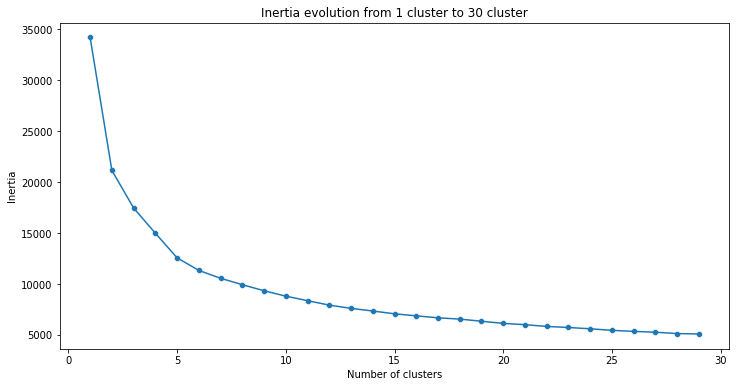

In [ ]:
max_k = 30
inertia = []

for k in range(1, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(scaled_audio_robust).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(1, max_k), y=inertia)
sns.scatterplot(x=range(1, max_k), y=inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

The silhouette coefficient can vary between -1 and +1: 

|   |   |
|---|---|
|+1   | the instance is well inside its own cluster and far from other clusters.  |
|0   | the instance is close to a cluster boundary.   |
|-1   | the instance may have been assigned to the wrong cluster.  |

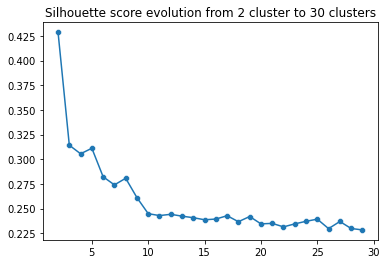

In [ ]:
max_k = 30
sil_score = []

for k in range(2, max_k): 
    labels = KMeans(n_clusters=k).fit(scaled_audio_robust).labels_
    sil_score.append(silhouette_score(scaled_audio_robust, labels))

plt.title(f'Silhouette score evolution from 2 cluster to {max_k} clusters')
sns.lineplot(x=range(2, max_k), y=sil_score)
sns.scatterplot(x=range(2, max_k), y=sil_score)
plt.show()

In [ ]:
plot_data = pd.DataFrame(scaled_audio_robust)
plot_data['cluster'] = audio_kmeans.labels_
plot_data.groupby(by="cluster").sample(5)

,,danceability,energy,speechiness,acousticness,instrumentalness,valence,tempo,cluster
name,artist,,,,,,,,
Get the Party Started,P!nk,0.736967,0.363316,0.983499,-0.000536,-0.000004,-0.699297,-2.866605,0
Angels,Robbie Williams,-0.146919,-0.181658,-0.000710,0.322445,-0.000004,-0.240234,-2.866067,0
Painkiller,Judas Priest,-0.132701,0.511464,0.002123,-0.000538,0.000163,-0.503906,-2.867257,0
Kaipuusamba,Maria Gasolina,0.120853,-0.834215,-0.000029,1.601954,0.000171,0.337891,-2.867849,0
In Your Own Sweet Way,Phil Woods,0.312796,-0.620811,-0.000476,0.000725,0.136427,-0.700625,-2.866673,0
Sexy And I Know It,LMFAO,0.511848,0.289242,6.763858,-0.000331,-0.000004,0.851562,0.415984,1
I Love My Bitch,Busta Rhymes,0.267773,0.195767,6.721041,-0.000477,-0.000004,0.642578,2.030162,1
This Is Why I'm Hot,MiMS,0.308057,-1.228219,12.330130,0.572963,-0.000004,0.246094,-0.847599,1
Mayor Que Yo - Live,Daddy Yankee,0.229858,-1.227760,5.864691,1.214788,-0.000004,-0.033203,-2.867509,1


In [ ]:
#find centers
centers = np.array(audio_kmeans.cluster_centers_)
centers

array([[-0.14647306, -0.218808  ,  0.37085226,  0.5610281 ,  0.5157841 ,
         0.05967464, -2.8607069 ],
       [ 0.12397758, -0.04717725,  6.52918571,  0.27017002,  0.12712528,
         0.19746676, -0.09393329],
       [-0.21638839,  0.12800421,  3.04761543,  0.17152325,  0.5183489 ,
        -0.07992019,  0.05527261],
       [ 0.03443575, -0.04244122,  0.06001504,  0.25194502,  0.29335803,
         0.22166117,  0.23310566],
       [-0.35037832, -0.96444019,  0.08488793,  1.74721372,  0.94872225,
        -0.29740521, -0.20397227]])

In [ ]:
#create 10 seperate dfs
cluster0 = scaled_audio_robust[scaled_audio_robust.cluster == 0]
cluster1 = scaled_audio_robust[scaled_audio_robust.cluster == 1]
cluster2 = scaled_audio_robust[scaled_audio_robust.cluster == 2]
cluster3 = scaled_audio_robust[scaled_audio_robust.cluster == 3]
cluster4 = scaled_audio_robust[scaled_audio_robust.cluster == 4]

In [ ]:
cluster1

,,danceability,energy,speechiness,acousticness,instrumentalness,valence,tempo,cluster
name,artist,,,,,,,,
"Canta Canta, Minha Gente",Martinho Da Vila,0.853081,-1.227989,7.427529,0.937354,-0.000004,1.066406,-0.501959,1
O Meu Amor É Glòria,Sílvia Pérez Cruz,0.030806,0.063492,8.326696,1.440462,-0.000004,1.029297,-0.429505,1
Karoliina Kaunis,Maria Gasolina,0.620853,-0.850088,6.271457,1.278971,0.000005,0.044922,0.423995,1
Aquarela Do Brasil,Gal Costa,0.146919,-1.228307,8.519375,0.001118,-0.000003,0.625000,0.592760,1
Vai (Menina amanhã de manhã),Tom Zé,0.426540,-1.228166,5.072568,1.831768,-0.000004,0.849609,0.355939,1
...,...,...,...,...,...,...,...,...,...
All Of My Help - Live,Ricky Dillard,-0.111374,0.303351,6.314275,0.318304,-0.000004,0.160156,1.673856,1
His Love,The Clark Sisters,-1.161825,0.343915,5.415108,0.581245,-0.000004,0.787109,-0.598117,1
Happy - Live/Remastered,Tasha Cobbs Leonard,-0.213270,0.331570,9.525586,0.355571,-0.000004,0.156250,1.500922,1


In [ ]:
#find 50 nearest songs for each cluster df
distance = pd.DataFrame(pairwise_distances(scaled_audio_robust.drop("cluster", axis=1), centers))

distance

,0,1,2,3,4
0,3.086488,6.685382,3.515632,1.536217,1.284633
1,3.367326,6.594737,3.363545,0.929840,2.196696
2,7.668058,2.028735,4.964462,7.626646,7.677036
3,3.277156,6.827565,3.853835,2.086023,1.450176
4,3.527926,6.036951,3.155088,2.109276,1.511422
...,...,...,...,...,...
5153,3.084728,7.078506,4.001802,2.742701,0.888004
5154,2.771093,6.955200,3.828356,2.459200,0.802441
5155,3.154608,7.315501,4.340910,3.309458,1.618787
5156,2.629207,7.080743,4.049919,2.828878,1.199172


In [ ]:
#with song names
distance2 = pd.DataFrame(pairwise_distances(scaled_audio_robust.drop("cluster", axis=1), centers), index=scaled_audio_robust.index)

distance2

,,0,1,2,3,4
name,artist,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,3.086488,6.685382,3.515632,1.536217,1.284633
Saudade De Bahia,Antônio Carlos Jobim,3.367326,6.594737,3.363545,0.929840,2.196696
"Canta Canta, Minha Gente",Martinho Da Vila,7.668058,2.028735,4.964462,7.626646,7.677036
Mulher Eu Sei,Chico César,3.277156,6.827565,3.853835,2.086023,1.450176
Rosa Morena,Kurt Elling,3.527926,6.036951,3.155088,2.109276,1.511422
...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,3.084728,7.078506,4.001802,2.742701,0.888004
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,2.771093,6.955200,3.828356,2.459200,0.802441
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,3.154608,7.315501,4.340910,3.309458,1.618787


In [ ]:
#cluster0["distance_to_center"] = pd.DataFrame(pairwise_distances(cluster0.drop(["cluster", "distance_to_center"], axis=1), centers[[0]]))
#cluster0
cluster_dist_0 = pd.DataFrame(pairwise_distances(cluster0.drop(["cluster"], axis=1), centers[[0]]),index=cluster0.index)
cluster_dist_1 = pd.DataFrame(pairwise_distances(cluster1.drop(["cluster"], axis=1), centers[[1]]),index=cluster1.index)
cluster_dist_2 = pd.DataFrame(pairwise_distances(cluster2.drop(["cluster"], axis=1), centers[[2]]),index=cluster2.index)
cluster_dist_3 = pd.DataFrame(pairwise_distances(cluster3.drop(["cluster"], axis=1), centers[[3]]),index=cluster3.index)
cluster_dist_4 = pd.DataFrame(pairwise_distances(cluster4.drop(["cluster"], axis=1), centers[[4]]),index=cluster4.index)

In [ ]:
cluster_dist_0.sort_values(by=0, inplace=True)
cluster_dist_0.head(50)

,,0
name,artist,
Blackeye,Love Inks,0.659105
When You Say Nothing At All,Ronan Keating,0.716644
Inhabit Our Praise,Cross Worship,0.732803
Nena Maldición (feat. Lenny Tavárez),Lenny Tavárez,0.736793
Angels,Robbie Williams,0.743218
Let It Fall - Live,Tasha Cobbs Leonard,0.767835
What I Did for Love (feat. Emeli Sandé),David Guetta,0.784606
SHE'S THE ONE,Monsta X,0.828100
Platonic Disease,Obituary,0.835925


In [ ]:
Feeling_like_a_wuss = cluster_dist_0.drop(["Platonic Disease", "Euphoria - Single Version", "Discerning Forces", "Tetragon", "Hung Up", "Dead Embryonic Cells", "Dead but Dreaming", "By the Light", "Black Winter Day", "Bleeding Torment", "Hustlin'", "The Holocaust Incarnate", "Ping Pong", "Blood Bath"], axis=0)


In [ ]:
Feeling_like_a_wuss.head(30)

,,0
name,artist,
Blackeye,Love Inks,0.659105
When You Say Nothing At All,Ronan Keating,0.716644
Inhabit Our Praise,Cross Worship,0.732803
Nena Maldición (feat. Lenny Tavárez),Lenny Tavárez,0.736793
Angels,Robbie Williams,0.743218
Let It Fall - Live,Tasha Cobbs Leonard,0.767835
What I Did for Love (feat. Emeli Sandé),David Guetta,0.784606
SHE'S THE ONE,Monsta X,0.828100
Platonic Disease,Obituary,0.835925


In [ ]:
cluster_dist_1.sort_values(by=0, inplace=True)
cluster_dist_1.head(50)

,,0
name,artist,
We Fly High,Jim Jones,0.605535
Schwung in die Kiste,Die Orsons,0.629025
American Boy,Estelle,0.690463
I Know What You Want (feat. Flipmode Squad),Busta Rhymes,0.742888
Tusa,KAROL G,0.798676
Body Talk (Mammoth),Dimitri Vegas & Like Mike,0.812646
D.A.N.C.E,Justice,0.833506
Thrift Shop (feat. Wanz),Macklemore & Ryan Lewis,0.913297
US,Moon Jong Up,0.963494


In [ ]:
Dont_mind_the_sprache_and_chill = cluster_dist_1.drop(["Stars Troll - Radio Edit	", "US	", "D.A.N.C.E	", "Baianá	", "Sexy And I Know It	", "LA NOCHE DE ANOCHE	", "Familiar	", "Troops of Doom	", "Noche De Sexo	", "Jamming	" , "Treat You Better	", "Sugar	", "los Disicipulos	", "11 PM	", "Fergalicious", "Memories (feat. Kid Cudi)	", "No Te Debí Besar	", "Canta Canta, Minha Gente	", "Ella Se Contradice (feat. Plan B)	", "A Mí	"], axis=0, inplace=True)
Dont_mind_the_sprache_and_chill

In [ ]:
cluster_dist_2.sort_values(by=0, inplace=True)
cluster_dist_2.head(50)

,,0
name,artist,
The Alphabeat,David Guetta,0.562280
Unholy Blasphemies,Morbid Angel,0.588992
Bind Torture Kill,Suffocation,0.615382
Soulless - remastered 2003,Grave,0.631610
Roots Bloody Roots,Sepultura,0.674024
Engorged With Impiety,Broken Hope,0.684972
Wolf Among Sheep,Broken Hope,0.712520
Darkest Dream,Monstrosity,0.717537
Regorge in the Morgue,Vomitory,0.723694


In [ ]:
cluster_dist_3.sort_values(by=0, inplace=True)
cluster_dist_3.head(50)

In [ ]:
cluster_dist_4.sort_values(by=0, inplace=True)
cluster_dist_4.head(50)